In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rocket_two_stages(V_g, m_p, m_n, m_t, fuel_step=1000):
    """двухступенчатая ракета

    Args:
        V_g (float): скорость истекания газов.
        m_p (float): масса полезной нагрузки.
        m_n (float): масса несгоревшей конструкции (включая ступени).
        m_t (float): общая масса топлива.
        fuel_step (float): шаг уменьшения массы топлива (по умолчанию 1000).
    """
    m_total = m_p + m_n + m_t
    V0 = 0

    mt1 = 0.7 * m_t
    fuel_mass1, Vp1_list = [], []

    #первая ступень
    while mt1 > 0:
        Vp1 = V0 + V_g * np.log(m_total / (m_p + m_n + 0.3 * m_t + mt1))
        fuel_mass1.append(0.3 * m_t + mt1)
        Vp1_list.append(Vp1)
        mt1 -= fuel_step

    #вторая ступень
    mt2 = 0.3 * m_t
    fuel_mass2, Vp2_list = [], []
    while mt2 > 0:
        Vp2 = Vp1 + V_g * np.log((m_p + m_n + 0.3 * m_t) / (m_p + m_n + mt2))
        fuel_mass2.append(mt2)
        Vp2_list.append(Vp2)
        mt2 -= fuel_step

    plt.figure()
    plt.grid(True)
    plt.plot(fuel_mass1, Vp1_list, 'r*', label="Первая ступень")
    plt.plot(fuel_mass2, Vp2_list, 'b*', label="Вторая ступень")
    plt.xlabel('Масса оставшегося топлива, кг')
    plt.ylabel('Скорость ракеты, м/с')
    plt.title('Скорость двухступенчатой ракеты от массы топлива')
    plt.legend()
    plt.show()



In [7]:
def rocket_three_stages(V_g, m_p, m_n, m_t, fuel_step=1000):
    """трехступенчатая ракета

    args:
        V_g (float): скорость истекания газов.
        m_p (float): масса полезной нагрузки.
        m_n (float): масса несгоревшей конструкции (включая ступени).
        m_t (float): общая масса топлива.
        fuel_step (float): шаг уменьшения массы топлива (по умолчанию 1000).
    """
    m_total = m_p + m_n + m_t
    V0 = 0
    count = 0

    #первая ступень
    mt1 = 0.6 * m_t
    time1, Vp1_list = [], []
    while mt1 > 0:
        count += 1
        Vp1 = V0 + V_g * np.log(m_total / (m_p + m_n + 0.4 * m_t + mt1))
        time1.append(count)
        Vp1_list.append(Vp1)
        mt1 -= fuel_step

    #вторая ступень
    mt2 = 0.2 * m_t
    time2, Vp2_list = [], []
    while mt2 > 0:
        count += 1
        Vp2 = Vp1 + V_g * np.log((m_p + m_n + 0.4 * m_t) / (m_p + m_n + 0.2 * m_t + mt2))
        time2.append(count)
        Vp2_list.append(Vp2)
        mt2 -= fuel_step

    #третья ступень
    mt3 = 0.2 * m_t
    time3, Vp3_list = [], []
    while mt3 > 0:
        count += 1
        Vp3 = Vp2 + V_g * np.log((m_p + m_n + 0.2 * m_t) / (m_p + m_n + mt3))
        time3.append(count)
        Vp3_list.append(Vp3)
        mt3 -= fuel_step


    plt.figure()
    plt.grid(True)
    plt.plot(time1, Vp1_list, 'r*', label="Первая ступень")
    plt.plot(time2, Vp2_list, 'b*', label="Вторая ступень")
    plt.plot(time3, Vp3_list, 'g*', label="Третья ступень")
    plt.xlabel('Время, с')
    plt.ylabel('Скорость ракеты, м/с')
    plt.title('Скорость трехступенчатой ракеты от времени')
    plt.legend()
    plt.show()




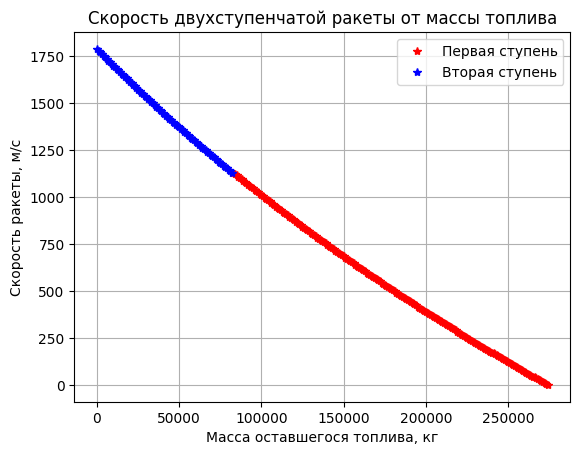

In [8]:
V_g = 3000
m_p = 300000
m_n = 34000
m_t = 274000

rocket_two_stages(V_g, m_p, m_n, m_t)

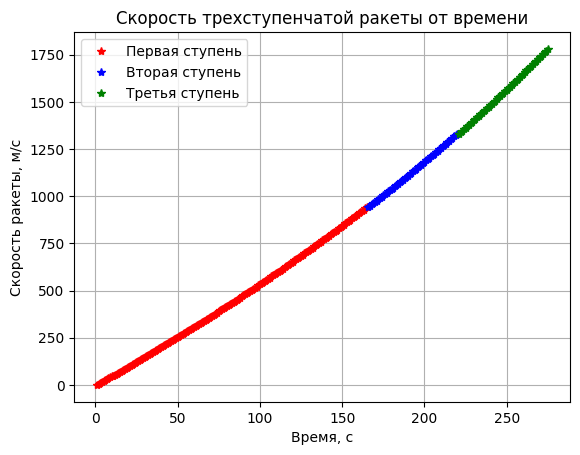

In [9]:
rocket_three_stages(V_g, m_p, m_n, m_t)